# Windermere Real Estate

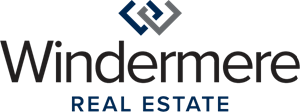

### Overview
<font color='red'>
Microsoft has decided to start a new movie studio, but they don’t know anything about making movies or the current movie market. I’ve been tasked with reviewing the data of recent movie for trends and provide insights and recommendations. I was able to combine basic movie data (titles, runtime, and genre) from IMDB and budget and gross data from The Numbers. When comparing genre information from the top 100 worldwide grossing films to production budgets and gross, trends began to develop. Action and Adventure films are the most popular and highest grossing among the top films. They are also the films with the highest production budgets. I would recommend Microsoft create an Action, Adventure, Sci-Fi film and expect to spend 245 million.
</font>

### Business Understanding
<font color='red'>
As a stakeholder it’s important to understand the market and that include potential budgets and return on investments. With nearly 700 movies released every year, over the last decade, it can be hard to know where to start. My goal is to answer three questions about current market:

What trends are there with the different genres?
What type of budget can you expect?
What kind of movie lengths are present in the top movies?
</font>    
    
### Data Understanding
<font color='red'>
IMDB provides us with an extensive database of movie information. Here you can find everything from actors and director to release dates and runtime. For this analysis we will focus on movie title, release year, and genres. We will also use information from The Number. Here we once again from the movie title and release date, but we also find the production budget and gross infromation.

Let's start by importing all of the libraries and modules I will need for this project.
</font>

In [37]:
from zipfile import ZipFile 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sin, cos, sqrt, atan2, radians
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Allows the plots to be displayed and be stored with the notebook.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading the Data
<font color='red'>
In order to analyze the date, I first need to read the data and understand what information it gives me.

IMDB
Before I can read what is in the database, I need to unzip the IMDB database and connect to it.
</font>


In [38]:
kc = pd.read_csv('data/kc_house_data.csv')
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


| Column Names | Descriptions |
| --- | --- |
| `id` | Unique identifier for a house |
| `date` | Date house was sold |
| `price` | Sale price (prediction target) |
| `bedrooms` | Number of bedrooms |
| `bathrooms` | Number of bathrooms |
| `sqft_living` | Square footage of living space in the home |
| `sqft_lot` | Square footage of the lot |
| `floors` | Number of floors (levels) in house |
| `waterfront` | Whether the house is on a waterfront |
| `view` | Quality of view from house |
| `condition` | How good the overall condition of the house is. Related to maintenance of house. |
| `grade` | Overall grade of the house. Related to the construction and design of the house. |
| `sqft_above` | Square footage of house apart from basement |
| `sqft_basement` | Square footage of the basement |
| `yr_built` | Year when house was built |
| `yr_renovated` | Year when house was renovated |
| `zipcode` | ZIP Code used by the United States Postal Service |
| `lat` | Latitude coordinate |
| `long` | Longitude coordinate |
| `sqft_living15` | The square footage of interior housing living space for the nearest 15 neighbors |
| `sqft_lot15` | The square footage of the land lots of the nearest 15 neighbors |

In [39]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [40]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Cleaning the Data
Before we can get into the analysis, I will need to clean the data.

- Check for null values
- Add data where applicable
- Remove data where data can't be added

In [41]:
# This will tell me how many null values we have and where they are.
kc.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [42]:
# I wrote a function to give me the missing percentage for
# a given column in a dataframe.
def miss_perc(column):
    perc = (column.isnull().sum() / len(column))*100
    print('There is {}% missing data'.format(round(perc, 2)))

Let start with <code>waterfront</code>.

In [43]:
kc.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

Now that we have this function, let's see how much data is missing from the <code>waterfront</code> column.

In [44]:
# Run the function to see percentage of missing data from genres.
miss_perc(kc['waterfront'])

There is 11.0% missing data


11% is a significant amount of data.  Since there are so few homes with waterfront, we can assume that the missing values are for **NO** waterfront property.  I am also making the assumption that if a property is waterfront, that is something that they would make sure to have in the listing.  Here, we can use <code>.fillna</code> to replaxce all of the null values with "NO".

In [45]:
kc['waterfront'].fillna('NO', inplace=True)

In [46]:
kc.waterfront.value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [47]:
#Visually confirm the values were replaced.
kc.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Now let's move onto <code>view</code>.

In [48]:
kc.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [49]:
# Run the function to see percentage of missing data from genres.
miss_perc(kc['view'])

There is 0.29% missing data


Even though 0.29% is quite small, I beleive the better option would be to replace the null values with **NONE**.  Once again I am making the assumption that if the home had a view, that would be something they would like to disclose.

In [50]:
kc['view'].fillna('NONE', inplace=True)

In [51]:
# Let's see if it worked
kc.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Now let's move onto <code>yr_renovated</code>.

In [52]:
kc.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [53]:
# Run the function to see percentage of missing data from genres.
miss_perc(kc['yr_renovated'])

There is 17.79% missing data


Once again, 17.79% is a significant amount of data. While the vast majority of the homes show there has been no renovations and, once again, assuming that information would want to be disclosed, I will fill in the missing data with "0.0" to show no renovations.

In [54]:
kc['yr_renovated'].fillna(0.0, inplace=True)

In [55]:
# Let's see if it worked
kc.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [56]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

I have removed all of the null values.  Let's see if there are any other common placeholders in the data.

In [57]:
kc.isin(['?', '#', 'N/A', '-']).any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement     True
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

<code>sqft_basement</code> is showing a placeholder, let's see what it is.

In [58]:
kc.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
172.0         1
2390.0        1
1481.0        1
2350.0        1
2240.0        1
Name: sqft_basement, Length: 304, dtype: int64

With over half of the data showing 0.0, we will use this for "?" as that would be the median value

In [59]:
kc['sqft_basement'].replace('?', 0, inplace=True)

In [60]:
kc.sqft_basement.value_counts()

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
          ...  
172.0         1
2390.0        1
1481.0        1
2350.0        1
2240.0        1
Name: sqft_basement, Length: 304, dtype: int64

It created a "0" and a "0.0".  Let's see how it saved the data.

In [61]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

It looks like it converted the data to a <code>string</code>.  Let's change it back to <code>float</code>.

In [62]:
kc['sqft_basement'] = kc['sqft_basement'].astype(float)

In [63]:
kc.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [64]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

I also see that <code>yr_renovated</code> is float.  Since we do not need decimal points for a year, we can convert is to <code>int</code>

In [65]:
kc['yr_renovated'] = kc['yr_renovated'].astype(int)
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Trimming the data
When reviewing Windermere's website, I saw that only a hand full of properties were listed at over $900k.  We can see that the mean for our data is around $540k but the max goes all the way up to $7.7mil.  Let's take a look at the split for the home prices.

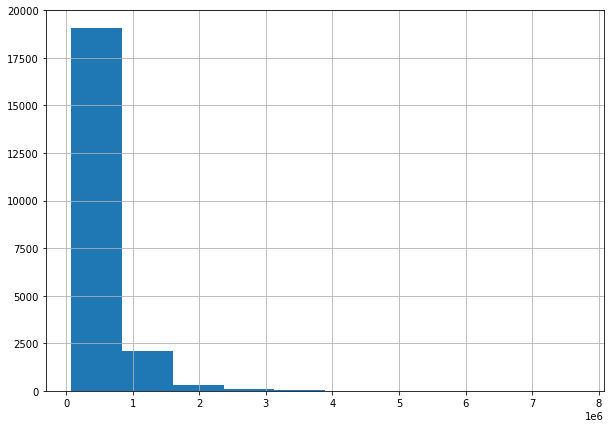

In [66]:
kc['price'].hist(figsize=(10,7));

Let's see how much of the data is for home that are over $900k.

In [67]:
# I wrote a function to give me percentage of homes
# over and under a given price point.
def price_compare(price):
    over = kc[kc['price'] > price]
    under = kc[kc['price'] <= price]
    over_per = (len(over)/len(kc['price']))*100
    under_per = (len(under)/len(kc['price']))*100
    print('There is {}% of homes over ${}'.format(round(over_per, 2), price))
    print('There is {}% of homes under ${}'.format(round(under_per, 2), price))

In [68]:
price_compare(1000000)

There is 6.75% of homes over $1000000
There is 93.25% of homes under $1000000


In [69]:
price_compare(900000)

There is 9.41% of homes over $900000
There is 90.59% of homes under $900000


In [70]:
price_compare(800000)

There is 13.63% of homes over $800000
There is 86.37% of homes under $800000


In [71]:
price_compare(850000)

There is 11.26% of homes over $850000
There is 88.74% of homes under $850000


While I do want to want to reduce the data down to a price that is more in line with Windermere's clientele, I also do not want to remove too much data.  I will make the cut off at $900k.  This way we remove less than 10% of the data and are more in line with Windermere's customers.

In [73]:
kc_900 = kc[kc['price'] <= 900000]
kc_900.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19564 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19564 non-null  int64  
 1   date           19564 non-null  object 
 2   price          19564 non-null  float64
 3   bedrooms       19564 non-null  int64  
 4   bathrooms      19564 non-null  float64
 5   sqft_living    19564 non-null  int64  
 6   sqft_lot       19564 non-null  int64  
 7   floors         19564 non-null  float64
 8   waterfront     19564 non-null  object 
 9   view           19564 non-null  object 
 10  condition      19564 non-null  object 
 11  grade          19564 non-null  object 
 12  sqft_above     19564 non-null  int64  
 13  sqft_basement  19564 non-null  float64
 14  yr_built       19564 non-null  int64  
 15  yr_renovated   19564 non-null  int64  
 16  zipcode        19564 non-null  int64  
 17  lat            19564 non-null  float64
 18  long  

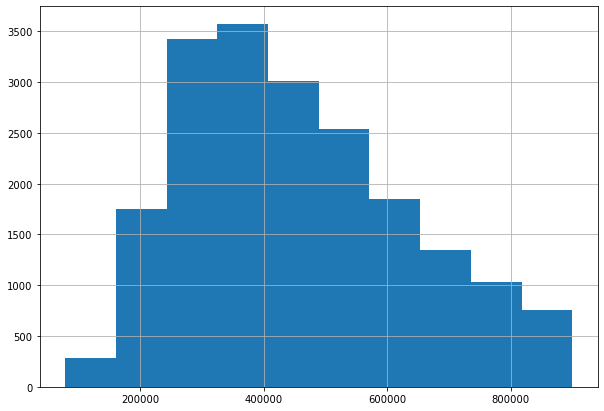

In [74]:
kc_900['price'].hist(figsize=(10,7));

This data looks much better, and while not perfectly normalized, this is much cleaner.

## Analysis
Now that we have the data the way we want it, we can start our analysis. We want to show Westermere tends in the housing market for the Seattle area. This will allow them to make better insight for their customers

### Squarefoot Living

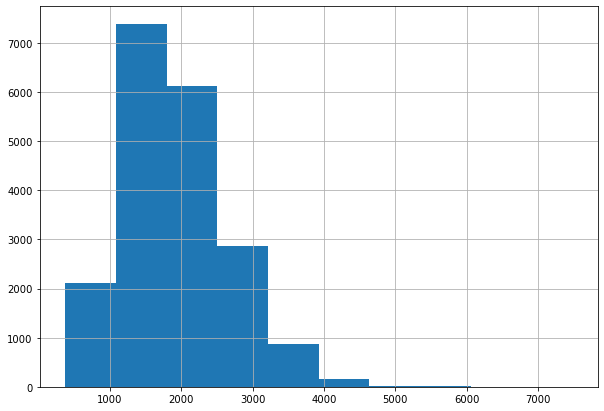

In [75]:
kc_900['sqft_living'].hist(figsize=(10,7));

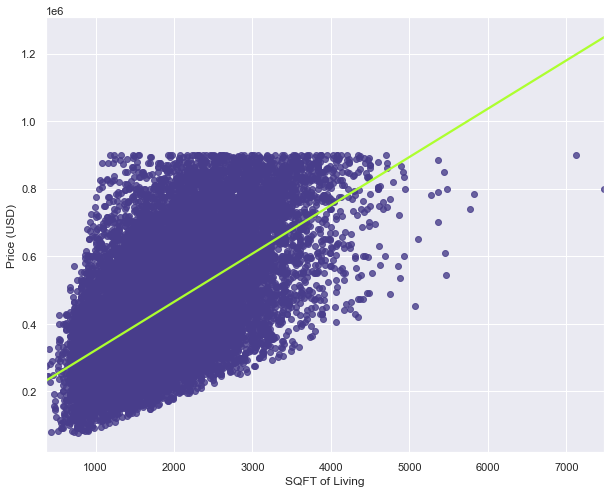

In [76]:
sns.set(rc={'figure.figsize':(10,8)})
m = sns.regplot(kc_900['sqft_living'], kc_900['price'], ci=None,
                scatter_kws={"color": "darkslateblue"}, line_kws={"color": "greenyellow"});
m.set(xlabel = "SQFT of Living", ylabel = 'Price (USD)');

In [77]:
kc_900['sqft_living'].describe()

count    19564.000000
mean      1922.176191
std        727.482659
min        370.000000
25%       1380.000000
50%       1820.000000
75%       2370.000000
max       7480.000000
Name: sqft_living, dtype: float64

In [78]:
def group_sqft(sqft):
    
    if sqft < 1000:
        return '<1k sqft'
    elif sqft >= 1000 and sqft < 1500:
        return '1-1.5k sqft'
    elif sqft >= 1500 and sqft < 2000:
        return '1.5-2k sqft'
    elif sqft >= 2000 and sqft < 2500:
        return '2-2.5k sqft'
    elif sqft >= 2500 and sqft < 3000:
        return '2.5-3k sqft'
    elif sqft >= 3000 and sqft < 3500:
        return '3-3.5k sqft'
    elif sqft >= 3500 and sqft < 4000:
        return '3.5-4k sqft'
    else:
        return '>4k sqft'

kc_sqft = pd.DataFrame(kc_900['price'])
    
# Create new feature based on the values returned from function
kc_sqft['sqft_group'] = kc_900['sqft_living'].apply(group_sqft)

kc_sqft.head()

,price,sqft_group
0,221900.0,1-1.5k sqft
1,538000.0,2.5-3k sqft
2,180000.0,<1k sqft
3,604000.0,1.5-2k sqft
4,510000.0,1.5-2k sqft


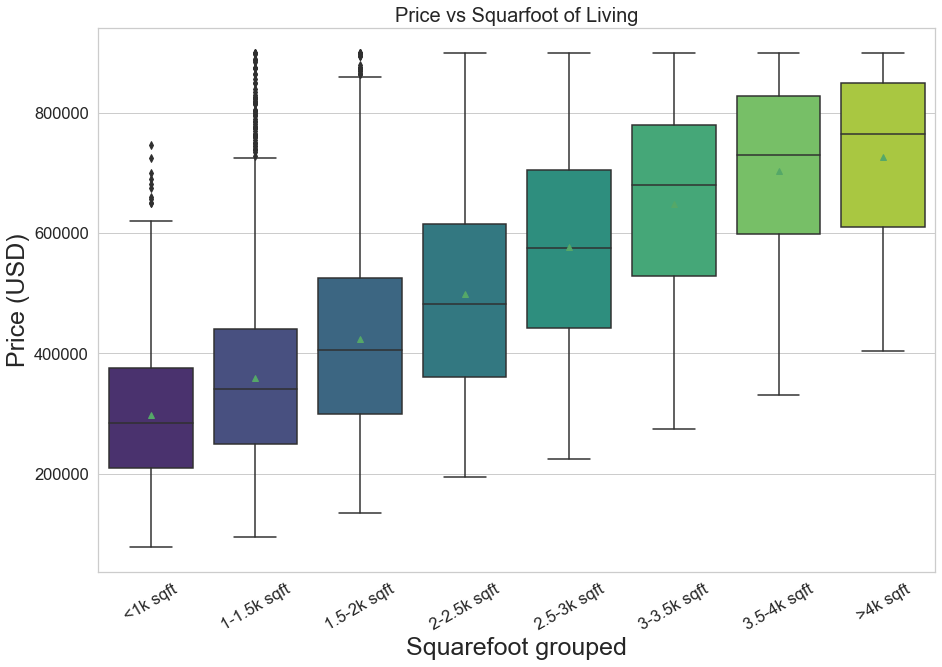

In [79]:
# Create a plot and set the size.
plt.figure(figsize=(15,10))

# Increase the size of the scale text.
sns.set(font_scale=1.5)

#sets the background color
sns.set_style("whitegrid")

# Plot the data
sns.boxplot(x=kc_sqft['sqft_group'],
            y=kc_sqft['price'], palette='viridis', showmeans=True,
           order=['<1k sqft', '1-1.5k sqft', '1.5-2k sqft', '2-2.5k sqft',
                  '2.5-3k sqft', '3-3.5k sqft', '3.5-4k sqft', '>4k sqft'])

# Set the barplot's title.
plt.title('Price vs Squarfoot of Living', fontsize=20)

# Label the y-axis
plt.ylabel('Price (USD)', fontsize=25)

# Label the x-axis
plt.xlabel('Squarefoot grouped', fontsize=25)

#Angles the x-axis information
plt.xticks(rotation=30);

In [80]:
kc_sqft.groupby('sqft_group').agg({'price': ['mean', 'median', 'min', 'max']})

price                              
                      mean    median       min       max
sqft_group                                              
1-1.5k sqft  358940.690780  340000.0   95000.0  900000.0
1.5-2k sqft  423410.068156  405000.0  135000.0  900000.0
2-2.5k sqft  498555.461769  481750.0  194250.0  900000.0
2.5-3k sqft  577421.641997  575000.0  225000.0  900000.0
3-3.5k sqft  648528.085515  680000.0  274975.0  900000.0
3.5-4k sqft  703756.990000  730000.0  330000.0  900000.0
<1k sqft     297571.158416  285000.0   78000.0  747000.0
>4k sqft     725958.408284  765000.0  404000.0  900000.0

### Bedrooms

In [81]:
kc_900['bedrooms'].value_counts()

3     9362
4     5850
2     2712
5     1194
6      208
1      195
7       27
8        9
9        3
10       2
11       1
33       1
Name: bedrooms, dtype: int64

Jumping from 11 bedrooms to 33 and still being under $900k seems like a typo.  I can assume that they meant to out 3, but since it is only one dataset, I will remove it.

In [82]:
kc_900 = kc_900[kc_900.bedrooms != 33]

In [83]:
kc_900['bedrooms'].value_counts()

3     9362
4     5850
2     2712
5     1194
6      208
1      195
7       27
8        9
9        3
10       2
11       1
Name: bedrooms, dtype: int64

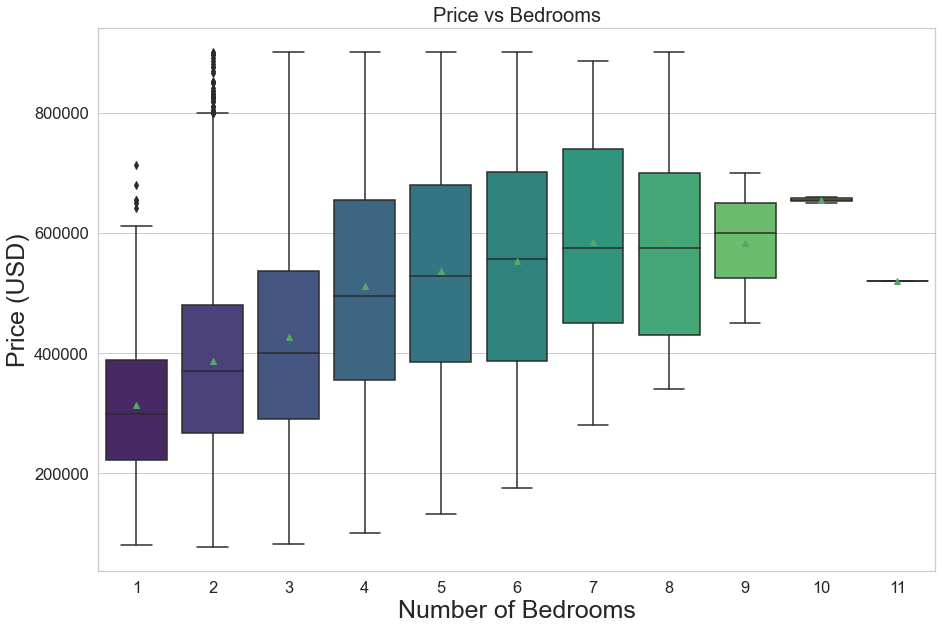

In [84]:
# Create a plot and set the size.
plt.figure(figsize=(15,10))

# Increase the size of the scale text.
sns.set(font_scale=1.5)

#sets the background color
sns.set_style("whitegrid")

# Plot the data
sns.boxplot(x=kc_900['bedrooms'],
            y=kc_900['price'], palette='viridis', showmeans=True)

# Set the barplot's title.
plt.title('Price vs Bedrooms', fontsize=20)

# Label the y-axis
plt.ylabel('Price (USD)', fontsize=25)

# Label the x-axis
plt.xlabel('Number of Bedrooms', fontsize=25);

In [85]:
kc_900.groupby('bedrooms').agg({'price': ['mean', 'median', 'min', 'max']})

price                              
                   mean    median       min       max
bedrooms                                             
1         313461.200000  299000.0   80000.0  713000.0
2         386579.469764  370000.0   78000.0  900000.0
3         426276.416257  400000.0   82000.0  900000.0
4         512023.050085  495000.0  100000.0  900000.0
5         537040.489950  527600.0  133000.0  900000.0
6         553054.341346  556500.0  175000.0  900000.0
7         584074.703704  575000.0  280000.0  884900.0
8         588444.444444  575000.0  340000.0  900000.0
9         583333.000000  599999.0  450000.0  700000.0
10        655000.000000  655000.0  650000.0  660000.0
11        520000.000000  520000.0  520000.0  520000.0

### Bathrooms

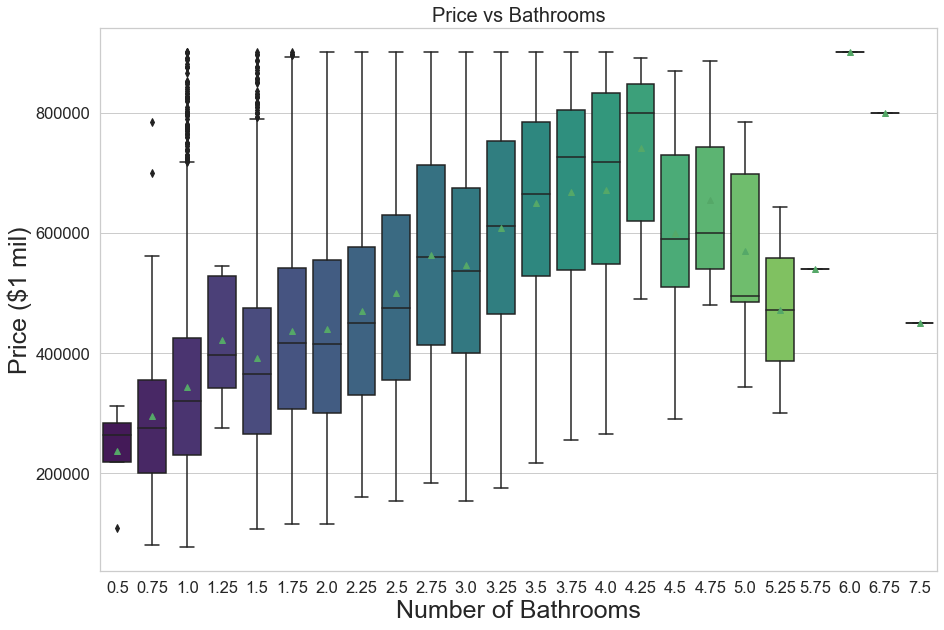

In [86]:
# Create a plot and set the size.
plt.figure(figsize=(15,10))

# Increase the size of the scale text.
sns.set(font_scale=1.5)

#sets the background color
sns.set_style("whitegrid")

# Plot the data
sns.boxplot(x=kc_900['bathrooms'],
            y=kc_900['price'], palette='viridis', showmeans=True)

# Set the barplot's title.
plt.title('Price vs Bathrooms', fontsize=20)

# Label the y-axis
plt.ylabel('Price ($1 mil)', fontsize=25)

# Label the x-axis
plt.xlabel('Number of Bathrooms', fontsize=25);

In [87]:
kc_900.groupby('bathrooms').agg({'price': ['mean', 'median', 'min', 'max']})

price                              
                    mean    median       min       max
bathrooms                                             
0.50       237375.000000  264000.0  109000.0  312500.0
0.75       294936.647887  275000.0   80000.0  785000.0
1.00       343586.162360  319950.0   78000.0  900000.0
1.25       422278.571429  397500.0  275000.0  545000.0
1.50       392281.484031  365000.0  107000.0  900000.0
1.75       436302.929582  415975.0  115000.0  900000.0
2.00       439739.031350  415000.0  115000.0  900000.0
2.25       469784.468833  450000.0  160000.0  900000.0
2.50       500500.702556  475000.0  153503.0  900000.0
2.75       563087.039722  560000.0  183750.0  900000.0
3.00       545951.850000  536000.0  154000.0  900000.0
3.25       607265.674699  611500.0  176000.0  900000.0
3.50       649957.619910  665000.0  216650.0  900000.0
3.75       667127.096154  726080.0  255000.0  900000.0
4.00       670773.687500  717500.0  265000.0  900000.0
4.25       741084.210526  800000.0  490000.0  890000.0
4.50       598819.068966  589900.0  290000.0  869900.0
4.75       654633.333333  599000.0  480000.0  884900.0
5.00       569642.857143  495000.0  343000.0  784500.0
5.25       471750.000000  471750.0  300000.0  643500.0
5.75       540000.000000  540000.0  540000.0  540000.0
6.00       900000.000000  900000.0  900000.0  900000.0
6.75       800000.000000  800000.0  800000.0  800000.0
7.50       450000.000000  450000.0  450000.0  450000.0

### Floors

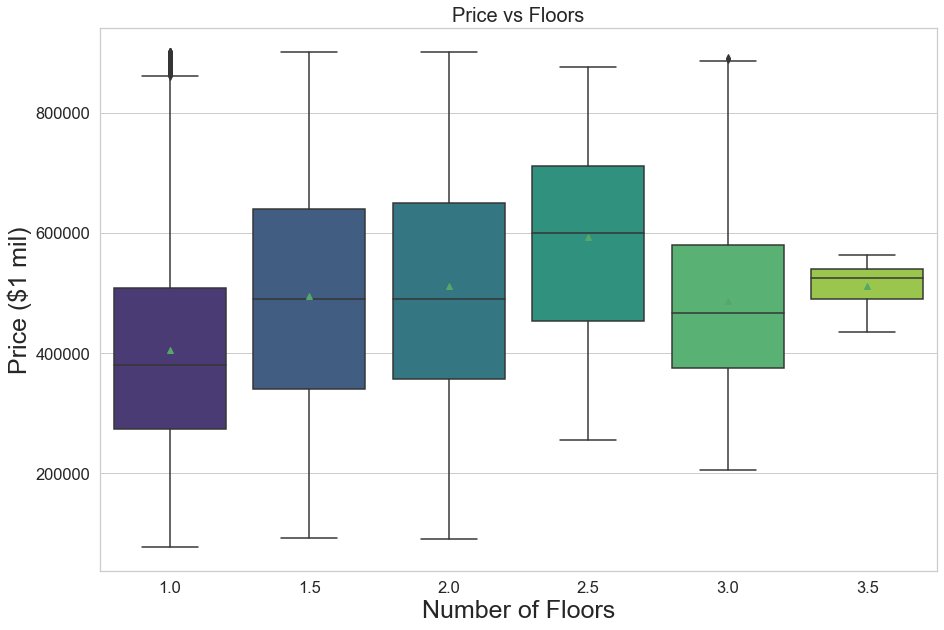

In [88]:
# Create a plot and set the size.
plt.figure(figsize=(15,10))

# Increase the size of the scale text.
sns.set(font_scale=1.5)

#sets the background color
sns.set_style("whitegrid")

# Plot the data
sns.boxplot(x=kc_900['floors'],
            y=kc_900['price'], palette='viridis', showmeans=True)

# Set the barplot's title.
plt.title('Price vs Floors', fontsize=20)

# Label the y-axis
plt.ylabel('Price ($1 mil)', fontsize=25)

# Label the x-axis
plt.xlabel('Number of Floors', fontsize=25);

In [89]:
kc_900.groupby('floors').agg({'price': ['mean', 'median', 'min', 'max']})

price                              
                 mean    median       min       max
floors                                             
1.0     404874.689076  379330.0   78000.0  900000.0
1.5     494746.181714  490000.0   92000.0  900000.0
2.0     510953.655754  489000.0   90000.0  900000.0
2.5     592490.157895  599999.0  255000.0  875000.0
3.0     487071.088235  467000.0  205000.0  890000.0
3.5     511916.666667  525000.0  435000.0  563500.0

### Condition

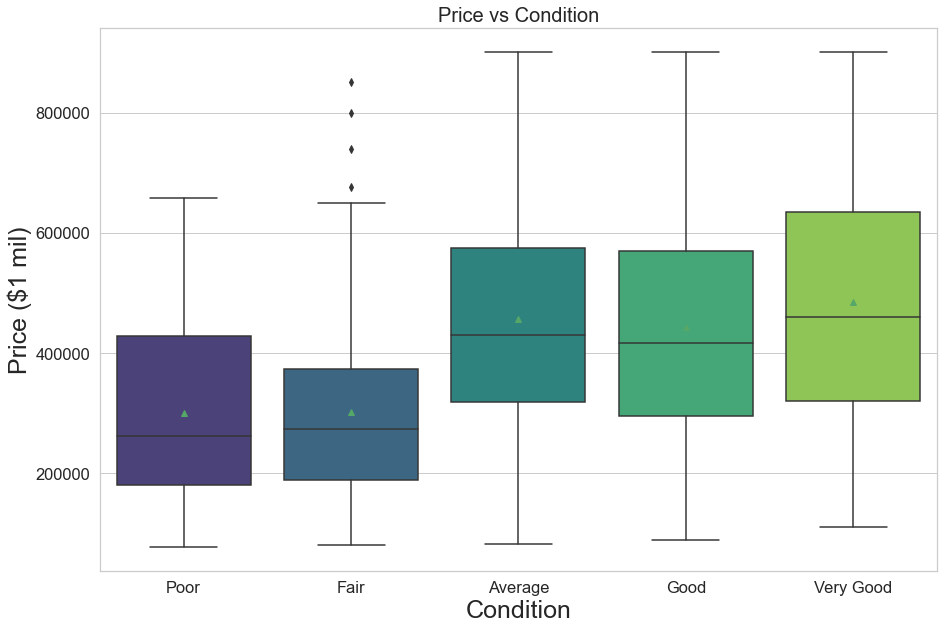

In [90]:
# Create a plot and set the size.
plt.figure(figsize=(15,10))

# Increase the size of the scale text.
sns.set(font_scale=1.5)

#sets the background color
sns.set_style("whitegrid")

# Plot the data
sns.boxplot(x=kc_900['condition'],
            y=kc_900['price'], palette='viridis', showmeans=True,
           order = ['Poor', 'Fair', 'Average', 'Good', 'Very Good'])

# Set the barplot's title.
plt.title('Price vs Condition', fontsize=20)

# Label the y-axis
plt.ylabel('Price ($1 mil)', fontsize=25)

# Label the x-axis
plt.xlabel('Condition', fontsize=25);

In [91]:
kc_900.groupby('condition').agg({'price': ['mean', 'median', 'min', 'max']})

price                              
                    mean    median       min       max
condition                                             
Average    456603.187013  429900.0   82000.0  900000.0
Fair       301839.692771  274250.0   80000.0  850000.0
Good       443893.687932  417000.0   89000.0  900000.0
Poor       299676.785714  262500.0   78000.0  658000.0
Very Good  484183.691781  460000.0  110000.0  900000.0

### Grade

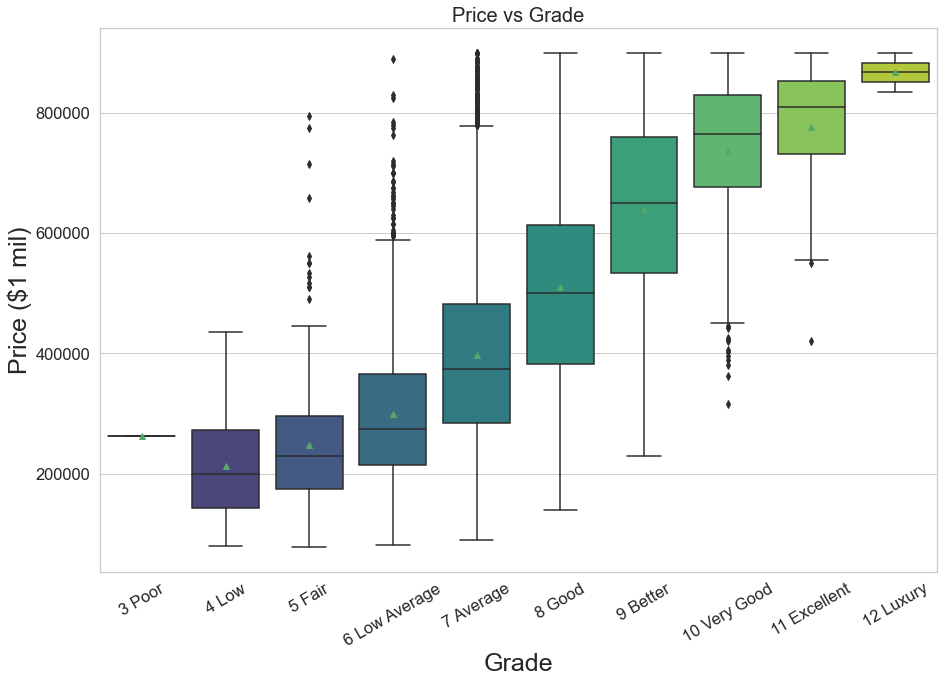

In [92]:
# Create a plot and set the size.
plt.figure(figsize=(15,10))

# Increase the size of the scale text.
sns.set(font_scale=1.5)

#sets the background color
sns.set_style("whitegrid")

# Plot the data
sns.boxplot(x=kc_900['grade'],
            y=kc_900['price'], palette='viridis', showmeans=True,
           order = ['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average',
                   '8 Good', '9 Better', '10 Very Good', '11 Excellent',
                   '12 Luxury'])

# Set the barplot's title.
plt.title('Price vs Grade', fontsize=20)

# Label the y-axis
plt.ylabel('Price ($1 mil)', fontsize=25)

# Label the x-axis
plt.xlabel('Grade', fontsize=25)

#Angles the x-axis information
plt.xticks(rotation=30);

In [93]:
kc_900.groupby('grade').agg({'price': ['mean', 'median', 'min', 'max']})

price                              
                        mean    median       min       max
grade                                                     
10 Very Good   737043.356364  765000.0  316000.0  900000.0
11 Excellent   776946.914894  810000.0  420000.0  900000.0
12 Luxury      867500.000000  867500.0  835000.0  900000.0
3 Poor         262000.000000  262000.0  262000.0  262000.0
4 Low          212001.851852  200000.0   80000.0  435000.0
5 Fair         248523.971074  228700.0   78000.0  795000.0
6 Low Average  299082.744335  275000.0   82000.0  890000.0
7 Average      397704.489782  374700.0   90000.0  900000.0
8 Good         509914.479917  500000.0  140000.0  900000.0
9 Better       640360.856502  650000.0  230000.0  900000.0

### Squarefoot Lot

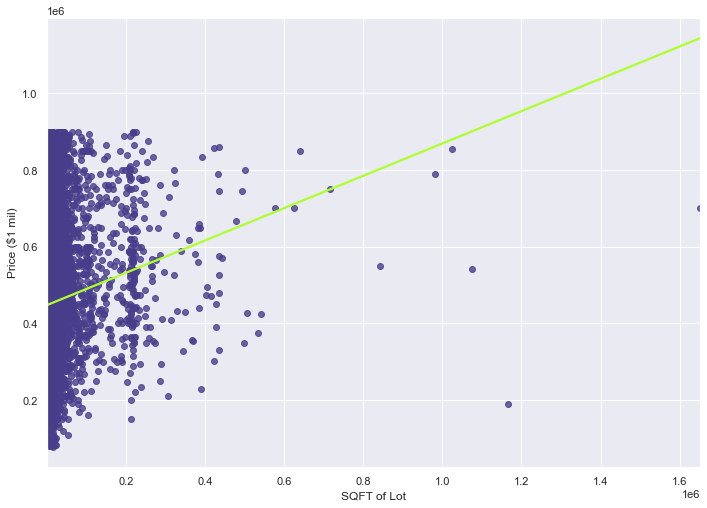

In [94]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
m = sns.regplot(kc_900['sqft_lot'], kc_900['price'], ci=None,
                scatter_kws={"color": "darkslateblue"}, line_kws={"color": "greenyellow"});
m.set(xlabel = "SQFT of Lot", ylabel = 'Price ($1 mil)');

### Basements

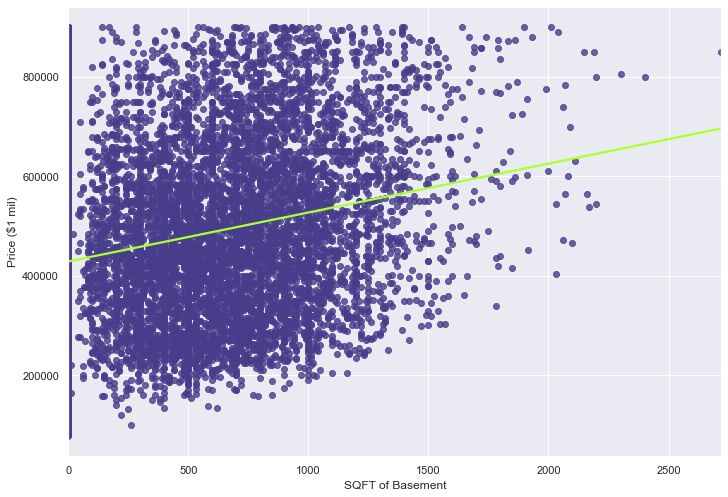

In [95]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
m = sns.regplot(kc_900['sqft_basement'], kc_900['price'], ci=None,
                scatter_kws={"color": "darkslateblue"}, line_kws={"color": "greenyellow"});
m.set(xlabel = "SQFT of Basement", ylabel = 'Price ($1 mil)');

In [96]:
kc_900['basement'] = np.where(kc_900['sqft_basement']==0, 0, 1)

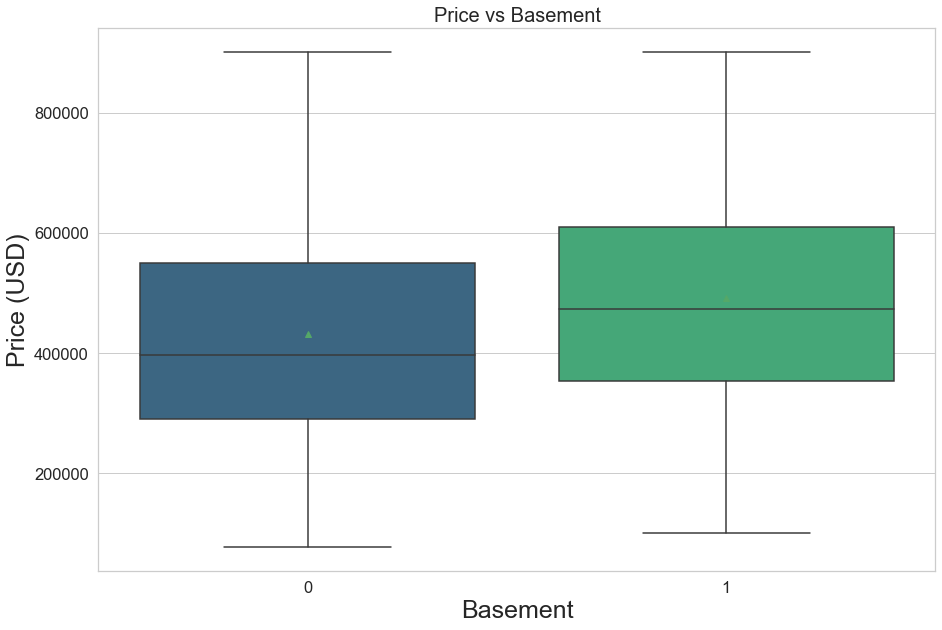

In [97]:
# Create a plot and set the size.
plt.figure(figsize=(15,10))

# Increase the size of the scale text.
sns.set(font_scale=1.5)

#sets the background color
sns.set_style("whitegrid")

# Plot the data
sns.boxplot(x=kc_900['basement'],
            y=kc_900['price'], palette='viridis', showmeans=True)

# Set the barplot's title.
plt.title('Price vs Basement', fontsize=20)

# Label the y-axis
plt.ylabel('Price (USD)', fontsize=25)

# Label the x-axis
plt.xlabel('Basement', fontsize=25);

In [98]:
kc_900.groupby('basement').agg({'price': ['mean', 'median', 'min', 'max']})

price                              
                   mean    median       min       max
basement                                             
0         431670.227988  397000.0   78000.0  900000.0
1         491877.436838  472500.0  100000.0  900000.0

### Renovated

In [99]:
kc_900['renovated'] = np.where(kc_900['yr_renovated']==0, 0, 1)

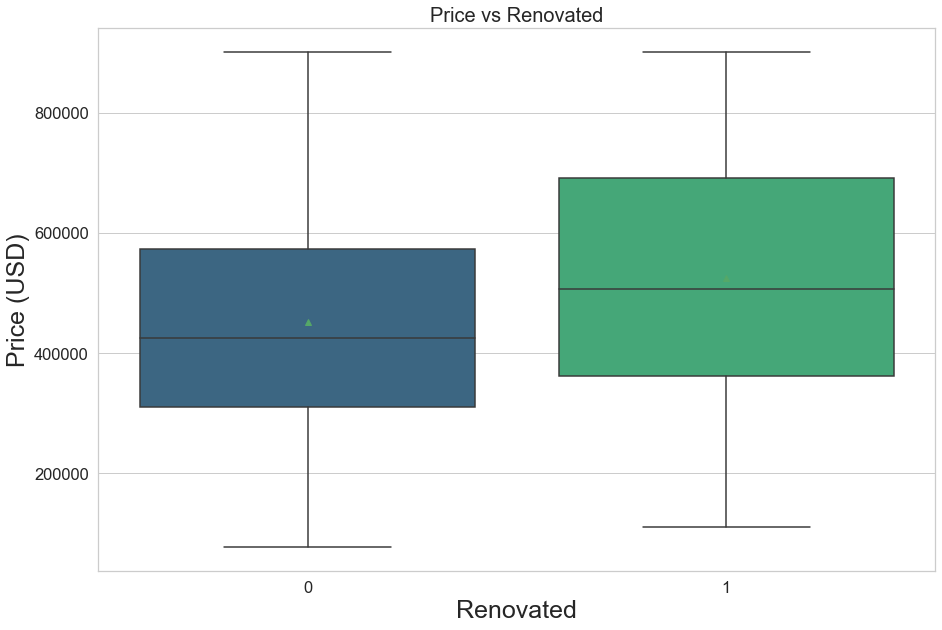

In [100]:
# Create a plot and set the size.
plt.figure(figsize=(15,10))

# Increase the size of the scale text.
sns.set(font_scale=1.5)

#sets the background color
sns.set_style("whitegrid")

# Plot the data
sns.boxplot(x=kc_900['renovated'],
            y=kc_900['price'], palette='viridis', showmeans=True)

# Set the barplot's title.
plt.title('Price vs Renovated', fontsize=20)

# Label the y-axis
plt.ylabel('Price (USD)', fontsize=25)

# Label the x-axis
plt.xlabel('Renovated', fontsize=25);

In [101]:
kc_900.groupby('renovated').agg({'price': ['mean', 'median', 'min', 'max']})

price                              
                    mean    median       min       max
renovated                                             
0          451649.296000  425000.0   78000.0  900000.0
1          524394.579041  507000.0  110000.0  900000.0

In [102]:
kc_900['yrs_since_reno'] = np.where(kc_900['yr_renovated']==0,
                                    2022-kc_900['yr_built'], 2022-kc_900['yr_renovated'])

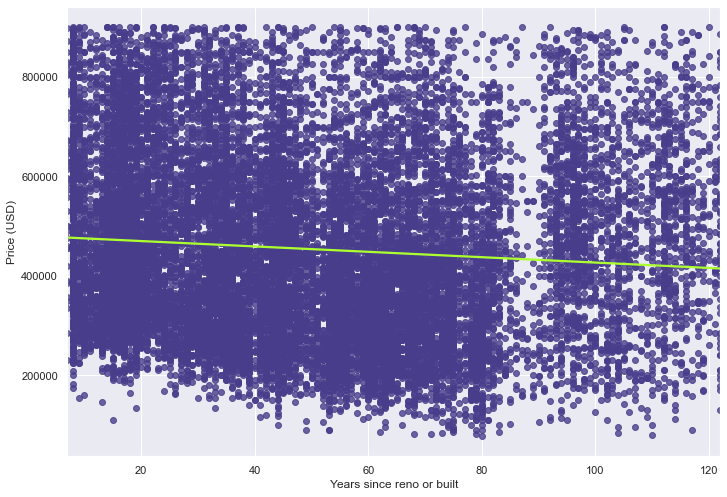

In [103]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
m = sns.regplot(kc_900['yrs_since_reno'], kc_900['price'], ci=None,
                scatter_kws={"color": "darkslateblue"}, line_kws={"color": "greenyellow"});
m.set(xlabel = "Years since reno or built", ylabel = 'Price (USD)');

### Location

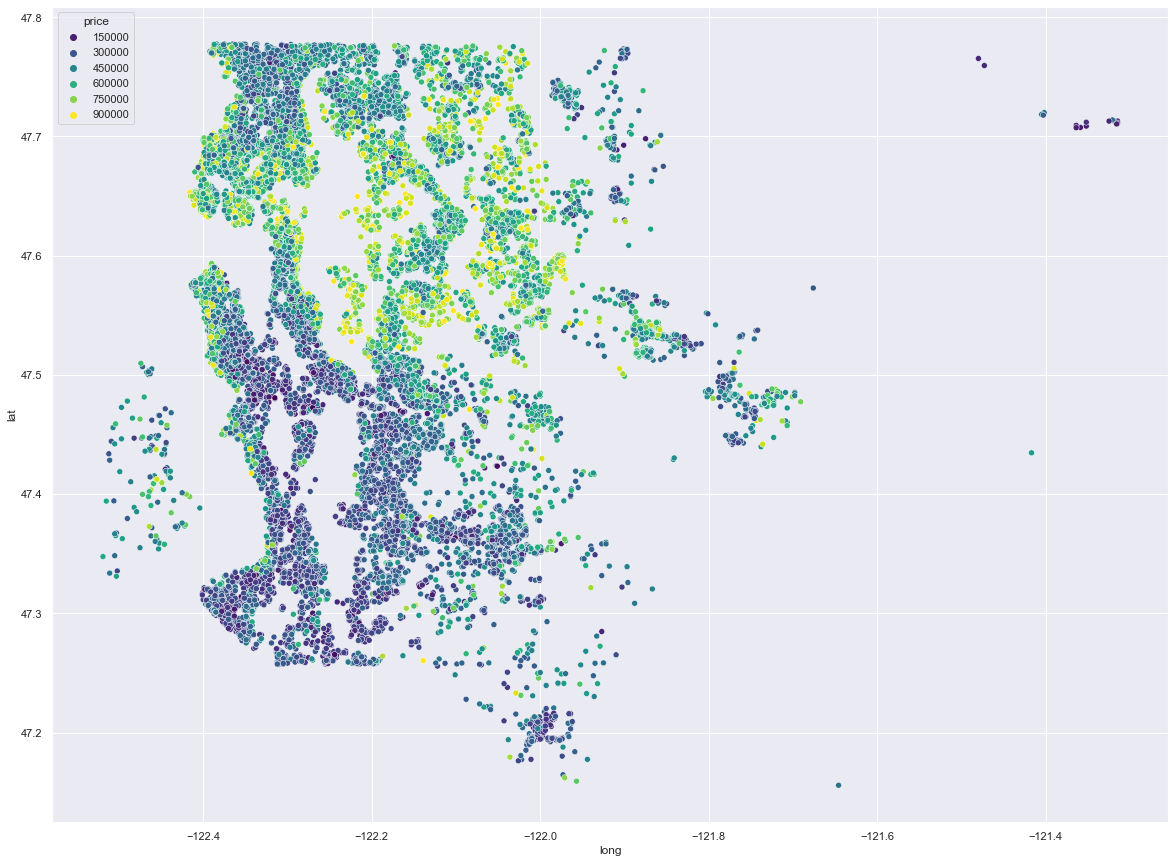

In [104]:
fig, ax = plt.subplots(figsize=(20,15))

sns.scatterplot(x='long', y='lat', palette='viridis', hue='price', data=kc_900);

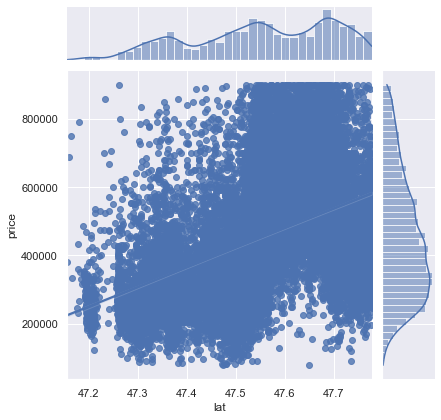

In [112]:
sns.jointplot('lat', 'price', data= kc_900, kind='reg')

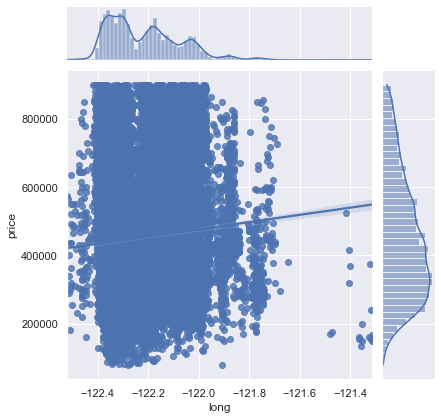

In [110]:
sns.jointplot('long', 'price', data= kc_900, kind='reg')

In [114]:
kc_900.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement', 'renovated',
       'yrs_since_reno'],
      dtype='object')

In [123]:
kc_col = kc_900.drop(columns=['id', 'date', 'price'], axis=1)
kc_col

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated,yrs_since_reno
0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,...,1955,0,98178,47.5112,-122.257,1340,5650,0,0,67
1,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,...,1951,1991,98125,47.7210,-122.319,1690,7639,1,1,31
2,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,...,1933,0,98028,47.7379,-122.233,2720,8062,0,0,89
3,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,...,1965,0,98136,47.5208,-122.393,1360,5000,1,0,57
4,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,...,1987,0,98074,47.6168,-122.045,1800,7503,0,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,...,2009,0,98103,47.6993,-122.346,1530,1509,0,0,13
21593,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,...,2014,0,98146,47.5107,-122.362,1830,7200,0,0,8
21594,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,...,2009,0,98144,47.5944,-122.299,1020,2007,0,0,13
21595,3,2.50,1600,2388,2.0,NO,NONE,Average,8 Good,1600,...,2004,0,98027,47.5345,-122.069,1410,1287,0,0,18


# Model

In [124]:
target = 'price'
x_col = kc_col.columns

In [125]:
predictors = '+'.join(x_col)

formula = target + '~' + predictors

model = ols(formula=formula, data=kc_900).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1187.
Date:                Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:49:37   Log-Likelihood:            -2.5340e+05
No. Observations:               19563   AIC:                         5.069e+05
Df Residuals:                   19527   BIC:                         5.072e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.715e+06   1.63e+06     -3.517      0.000    -8.9e+06   -2.53e+06
waterfront[T.YES]       1.164e+05   1.87e+04      6.215      0.000    7.97e+04    1.53e+05
view[T.EXCELLENT]       5.242e+04   1.25e+04      4.178      0.000    2.78e+04     7.7e+04
view[T.FAIR]            1.409e+04   7621.024      1.849      0.065    -848.227     2.9e+04
view[T.GOOD]            1.151e+04   7156.067      1.609      0.108   -2512.485    2.55e+04
view[T.NONE]           -5.075e+04   4044.953    -12.547      0.000   -5.87e+04   -4.28e+04
condition[T.Fair]      -3.344e+04   8091.334     -4.133      0.000   -4.93e+04   -1.76e+04
condition[T.Good]       2.226e+04   1855.228     11.996      0.000    1.86e+04    2.59e+04
condition[T.Poor]      -6.847e+04   1.95e+04     -3.505      0.000   -1.07e+05   -3.02e+04
condition[T.Very Good]  5.196e+04   3034.682     17.123      0.000     4.6e+04    5.79e+04
grade[T.11 Excellent]   1237.7889   1.56e+04      0.080      0.937   -2.93e+04    3.17e+04
grade[T.12 Luxury]      -6.29e+04   7.28e+04     -0.864      0.388   -2.06e+05    7.99e+04
grade[T.3 Poor]        -1.509e+05   1.03e+05     -1.472      0.141   -3.52e+05       5e+04
grade[T.4 Low]         -2.924e+05   2.07e+04    -14.124      0.000   -3.33e+05   -2.52e+05
grade[T.5 Fair]        -2.837e+05   8988.914    -31.567      0.000   -3.01e+05   -2.66e+05
grade[T.6 Low Average] -2.507e+05   6248.241    -40.130      0.000   -2.63e+05   -2.38e+05
grade[T.7 Average]     -1.901e+05   5430.456    -35.007      0.000   -2.01e+05   -1.79e+05
grade[T.8 Good]        -1.208e+05   5046.509    -23.940      0.000   -1.31e+05   -1.11e+05
grade[T.9 Better]      -4.377e+04   5015.388     -8.727      0.000   -5.36e+04   -3.39e+04
bedrooms               -7351.5597   1112.890     -6.606      0.000   -9532.920   -5170.200
bathrooms               1.933e+04   1853.277     10.431      0.000    1.57e+04     2.3e+04
sqft_living               66.2585     10.605      6.248      0.000      45.471      87.046
sqft_lot                   0.2179      0.027      8.043      0.000       0.165       0.271
floors                  3.031e+04   2003.637     15.128      0.000    2.64e+04    3.42e+04
sqft_above                 1.8773     10.569      0.178      0.859     -18.838      22.593
sqft_basement            -36.7387     11.015     -3.335      0.001     -58.329     -15.148
yr_built               -1313.3939    205.809     -6.382      0.000   -1716.797    -909.990
yr_renovated            2091.7971    295.148      7.087      0.000    1513.281    2670.313
zipcode                 -179.5543     17.816    -10.078      0.000    -214.476    -144.633
lat                     5.225e+05   5612.507     93.090      0.000    5.11e+05    5.33e+05
long                   -1.165e+04   6959.138     -1.674      0.094   -2.53e+04  

In [ ]:
kc_test = kc_dum.drop(columns=['lat', 'long', 'zipcode'])
kc_test.columns

In [ ]:
x_test = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_basement', 'yr_built', 'dist_to_med', 'waterfront',
       'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD',
       'grade_10_Very_Good', 'grade_11_Excellent', 'grade_12_Luxury',
       'grade_13_Mansion', 'grade_4_Low', 'grade_5_Fair',
       'grade_6_Low_Average', 'grade_7_Average', 'grade_8_Good',
       'grade_9_Better', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Very_Good', 'renovated']

In [ ]:
predictors = '+'.join(x_test)

formula = target + '~' + predictors

model = ols(formula=formula, data=kc_dum).fit()

model.summary()

# Convert Categorical Features into Numbers

In [ ]:
cat = ['waterfront', 'view', 'condition', 'grade']
kc_cat = kc[cat]
kc_cat.head()

In [ ]:
for x in cat:
    print(x.upper())
    print (kc_cat[x].value_counts())
    print()

## Binary Categories

In [ ]:
# Create a variable water that contains the relevant column from kc
water = kc_cat[['waterfront']]

# Instantiate an OrdinalEncoder
encoder_water = OrdinalEncoder()

# Fit the encoder on street_train
encoder_water.fit(water)

# Inspect the categories of the fitted encoder
encoder_water.categories_[0]

In [ ]:
# Transform water using the encoder and assign the result to water_encoded
water_encoded = encoder_water.transform(water)

# Flatten for appropriate shape
water_encoded = water_encoded.flatten()

# Visually inspect water_encoded
water_encoded

In [ ]:
# Replace value of water
kc_cat["waterfront"] = water_encoded.astype(int)

# Visually inspect kc
kc_cat

In [ ]:
kc_cat.waterfront.value_counts()

## Multiple Categories

### View

In [ ]:
# Create a variable view extracted from kc
view = kc_cat[["view"]]

# Instantiate a OneHotEncoder
ohe = OneHotEncoder(categories="auto",sparse=False, handle_unknown="ignore")

# Fit the encoder on view
ohe.fit(view)

# Inspect the categories of the fitted encoder
ohe.categories_

In [ ]:
# Transform view using the encoder and
# assign the result to view_encoded
view_encoded = ohe.transform(view)

# Visually inspect view_encoded
view_encoded

In [ ]:
# Make the transformed data into a dataframe
view_encoded = pd.DataFrame(
    # Pass in NumPy array
    view_encoded,
    
    # Set the index to match kc's index
    index=kc.index
)

view_encoded.columns = ohe.get_feature_names(['view'])

view_encoded.drop(columns='view_NONE', inplace=True)

# Visually inspect new dataframe
view_encoded

In [ ]:
# Drop original view column
kc_cat.drop("view", axis=1, inplace=True)

# Visually inspect kc
kc_cat

In [ ]:
# Concatenate the new dataframe with current kc
kc_cat = pd.concat([kc_cat, view_encoded], axis=1)

# Visually inspect kc
kc_cat


In [ ]:
kc_cat.info()

### Grade

In [ ]:
kc_cat.grade = kc_cat.grade.str.replace(' ','_')

In [ ]:
# Create a variable grade extracted from kc
grade = kc_cat[["grade"]]

# Fit the encoder on grade
ohe.fit(grade)

# Inspect the categories of the fitted encoder
ohe.categories_

In [ ]:
# Transform view using the encoder and
# assign the result to grade_encoded
grade_encoded = ohe.transform(grade)

# Visually inspect view_encoded
grade_encoded

In [ ]:
# Make the transformed data into a dataframe
grade_encoded = pd.DataFrame(
    # Pass in NumPy array
    grade_encoded,
    
    # Set the index to match kc's index
    index=kc_cat.index
)

grade_encoded.columns = ohe.get_feature_names(['grade'])

# Visually inspect new dataframe
grade_encoded

In [ ]:
# Drop original grade column
kc_cat.drop("grade", axis=1, inplace=True)

# Visually inspect kc
kc_cat

In [ ]:
# Concatenate the new dataframe with current kc
kc_cat = pd.concat([kc_cat, grade_encoded], axis=1)

# Visually inspect kc
kc_cat

In [ ]:
kc_cat.drop(columns=['grade_3_Poor'], inplace=True)

In [ ]:
kc_cat.info()

### Condition

In [ ]:
kc_cat.condition = kc_cat.condition.str.replace(' ','_')

In [ ]:
# Create a variable grade extracted from kc
cond = kc_cat[["condition"]]

# Fit the encoder on grade
ohe.fit(cond)

# Inspect the categories of the fitted encoder
ohe.categories_

In [ ]:
# Transform view using the encoder and
# assign the result to grade_encoded
cond_encoded = ohe.transform(cond)

# Visually inspect view_encoded
cond_encoded

In [ ]:
# Make the transformed data into a dataframe
cond_encoded = pd.DataFrame(
    # Pass in NumPy array
    cond_encoded,
    
    # Set the index to match kc's index
    index=kc_cat.index
)

cond_encoded.columns = ohe.get_feature_names(['condition'])

# Visually inspect new dataframe
cond_encoded

In [ ]:
# Drop original grade column
kc_cat.drop("condition", axis=1, inplace=True)

# Visually inspect kc
kc_cat

In [ ]:
# Concatenate the new dataframe with current kc
kc_cat = pd.concat([kc_cat, cond_encoded], axis=1)

# Visually inspect kc
kc_cat

In [ ]:
kc_cat.drop(columns=['condition_Poor'], inplace=True)

In [ ]:
kc_cat.info()

In [ ]:
kc_cat = pd.concat([kc_cat, kc_house['renovated']], axis=1)
kc_cat

In [ ]:
kc.drop(columns=['waterfront'], axis=1, inplace=True)
kc_dum = pd.concat([kc, kc_cat], axis=1)
kc_dum = kc_dum.drop(columns=['view','grade', 'condition'])
kc_dum.info()

In [ ]:
kc_dum.hist(figsize=(15,15));

In [ ]:
kc_dum.corr()

In [ ]:
abs(kc_dum.corr()) > .75

In [ ]:
corr=kc_dum.corr().abs().stack().reset_index().sort_values(0, ascending=False)

corr['pairs'] = list(zip(corr.level_0, corr.level_1))

corr.set_index(['pairs'], inplace = True)

corr.drop(columns=['level_1', 'level_0'], inplace = True)

corr.columns = ['cc']

corr.drop_duplicates(inplace=True)

corr[(corr.cc>.75) & (corr.cc <1)]

In [ ]:
kc_dum.drop(columns=['sqft_above', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], inplace=True)

In [ ]:
corr=kc_dum.corr().abs().stack().reset_index().sort_values(0, ascending=False)

corr['pairs'] = list(zip(corr.level_0, corr.level_1))

corr.set_index(['pairs'], inplace = True)

corr.drop(columns=['level_1', 'level_0'], inplace = True)

corr.columns = ['cc']

corr.drop_duplicates(inplace=True)

corr[(corr.cc>.75) & (corr.cc <1)]

In [ ]:
pd.set_option('display.max_columns', None)
kc_dum.head()

### New column for distance from downtown Medina

In [ ]:
kc_rad=pd.DataFrame()
kc_rad[['lat_rad','long_rad']] = (
    np.radians(kc.loc[:,['lat','long']])
)

In [ ]:
kc_rad.head()

In [ ]:
medina = pd.DataFrame({
    'lat': [47.6209],
    'long': [-122.2276]
})

medina[['lat_rad','long_rad']] = (
    np.radians(medina.loc[:,['lat','long']])
)

medina

In [ ]:
R = 3959

lat1 = medina['lat_rad']
lon1 = medina['long_rad']

def dist(x, y):
    lat2 = x
    lon2 = y
    
    dlon = y - lon1
    dlat = x - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [ ]:
kc['dist_to_med'] = kc_rad.apply(lambda r: dist(r['lat_rad'],r['long_rad']),axis=1)

In [ ]:
kc.head()

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
m = sns.regplot(kc['dist_to_med'], kc['price'], ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"});
m.set(xlabel = "Distance to Medina (Miles)", ylabel = 'Price ($1 mil)');

Here we can clearly see a 

In [ ]:
loc_col = ['price', 'zipcode', 'lat', 'long', 'dist_to_med']
kc_loc = kc[loc_col]
kc_loc.head()

In [ ]:
def group_dist(dist):
    
    if dist < 5:
        return '<5 miles'
    elif dist >= 5 and dist < 10:
        return '5-10 miles'
    elif dist >= 10 and dist < 15:
        return '10-15 miles'
    elif dist >= 15 and dist < 20:
        return '15-20 miles'
    else:
        return '>20 miles'

# Create new feature based on the values returned from function
kc_loc['dist_group'] = kc_loc['dist_to_med'].apply(group_dist)

kc_loc.head()

In [ ]:
# Create a plot and set the size.
plt.figure(figsize=(15,10))

# Increase the size of the scale text.
sns.set(font_scale=1.5)

#sets the background color
sns.set_style("whitegrid")

# Plot the data
sns.boxplot(x=kc_loc['dist_group'],
            y=kc_loc['price'], palette='viridis', showmeans=True,
           order=['<5 miles', '5-10 miles', '10-15 miles', '15-20 miles', '>20 miles'])

# Set the barplot's title.
plt.title('Price vs Distance from Medina', fontsize=20)

# Label the y-axis
plt.ylabel('Price ($1 mil)', fontsize=25)

# Label the x-axis
plt.xlabel('Distance from Medina grouped', fontsize=25)

#Angles the x-axis information
plt.xticks(rotation=30);

In [ ]:
kc_loc.dist_group.value_counts()/len(kc)

In [ ]:
kc_dist = kc_loc.groupby('dist_group').agg({'price': ['mean', 'min', 'max']})
kc_dist

In [ ]:
scatterplot_data = kc.drop("price", axis=1)

fig, axes = plt.subplots(ncols=4, nrows=9, figsize=(12, 25))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//4][index%4]
    ax.scatter(scatterplot_data[col], kc['price'], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")


In [ ]:
kc.hist(figsize=(15,15));

In [ ]:
kc['sqft_lot'].value_counts()

In [ ]:
kc.hist(figsize=(15,15));

In [ ]:
con = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
      'yr_built', 'sqft_living15', 'sqft_lot15', 'dist_to_dt']
kc_con = kc[con]
kc_con.hist(figsize=(15,15));

In [ ]:
bed = kc['bedrooms']
logbath = np.log(kc['bathrooms'])
loglot = np.log(kc['sqft_lot'])
logabove = np.log(kc['sqft_above'])
logbase = np.log(kc['sqft_basement'])
logbuilt = np.log(kc['yr_built'])
loglive15 = np.log(kc['sqft_living15'])
loglot15 = np.log(kc['sqft_lot15'])
logdist = np.log(kc['dist_to_dt'])

scaled_bed = (bed-min(bed))/(max(bed)-min(bed))
scaled_bath = (logbath-min(logbath))/(max(logbath)-min(logbath))
scaled_lot = (loglot-min(loglot))/(max(loglot)-min(loglot))
scaled_above = (logabove-min(logabove))/(max(logabove)-min(logabove))
scaled_base = (logbase-min(logbase))/(max(logbase)-min(logbase))
scaled_built = (logbuilt-min(logbuilt))/(max(logbuilt)-min(logbuilt))
scaled_live15 = (loglive15-min(loglive15))/(max(loglive15)-min(loglive15))
scaled_lot15 = (loglot15-min(loglot15))/(max(loglot15)-min(loglot15))
scaled_dist_to_dt = (logdist-min(logdist))/(max(logdist)-min(logdist))

kc_fin = pd.DataFrame([])
kc_fin['bedrooms'] = scaled_bed
kc_fin['bathrooms'] = scaled_bath
kc_fin['sqft_lot'] = scaled_lot
kc_fin['sqft_above'] = scaled_above
kc_fin['sqft_basement'] = scaled_base
kc_fin['yr_built'] = scaled_built
kc_fin['sqft_lot15'] = scaled_live15
kc_fin['sqft_lot15'] = scaled_lot15
kc_fin['dist_to_dt'] = scaled_dist_to_dt

kc_fin=pd.concat([kc['price'], kc_fin], axis=1)

kc_fin.head()

In [ ]:
logbase